In [71]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

import milanesas.eda_helper as eh

from toolkit.tools import (
    get_color,
    make_horizontal_grouped_chart,
)


# replace_column_content(df,'column',dict)

%matplotlib inline

In [72]:
font = {
    "family": "normal",
    #'weight' : 'bold',
    "size": 22,
}


plt.rcParams["figure.figsize"] = [12, 7]
plt.rc("font", **font)


plt.style.use("dark_background")

In [73]:
sns.set()

In [74]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [75]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

# GENDER
- Possible 'popular assumptions' regarding gender, within the IT industry, are explored. (Based on job searches where gender is specified.)

Análisis por Género de los Encuestados

Introducción:

El análisis por género de los encuestados nos permite comprender las diferencias en las experiencias y oportunidades que tienen hombres y mujeres en el sector IT en Paraguay.

Preguntas a explorar:

    ¿Cuál es la distribución por género de los encuestados?
    ¿Existe una diferencia significativa en el nivel educativo entre hombres y mujeres en el sector IT?
    ¿En qué áreas de estudio se especializan las mujeres y los hombres en el sector IT?
    ¿Qué tipo de experiencia laboral tienen las mujeres y los hombres en el sector IT?
    ¿Los hombres y las mujeres tienen las mismas oportunidades de empleo en el sector IT?
    ¿Existe una brecha salarial entre hombres y mujeres en el sector IT?
    ¿Qué desafíos enfrentan las mujeres en el sector IT?
    ¿Qué medidas se pueden tomar para reducir las desigualdades de género en el sector IT?

Recursos adicionales:

    [se quitó una URL no válida]: un estudio sobre las brechas de género en el sector IT en América Latina.
    [se quitó una URL no válida]: un informe sobre la participación de las mujeres en las carreras STEM.
    [se quitó una URL no válida]: una iniciativa para promover la igualdad de género en el sector IT.

Al responder a estas preguntas, se podrá obtener una imagen más completa de la situación de las mujeres en el sector IT en Paraguay. Esta información será valiosa para:

    Las empresas del sector IT: para comprender las necesidades y expectativas de las mujeres y desarrollar estrategias para atraer y retener talento femenino.
    Las instituciones educativas: para promover la participación de las niñas y las mujeres en las carreras STEM y prepararlas mejor para el mundo laboral.
    Los formuladores de políticas: para diseñar políticas públicas que promuevan la igualdad de género en el sector IT.

Tenga en cuenta que las preguntas específicas que formule dependerán de los datos que haya recopilado en su encuesta.

A continuación, se presentan algunos ejemplos de preguntas que puede formular para analizar las diferencias de género en la experiencia laboral:

    ¿Ha experimentado discriminación de género en su trabajo?
    ¿Ha tenido dificultades para encontrar un empleo en el sector IT debido a su género?
    ¿Ha tenido dificultades para ascender en su carrera debido a su género?
    ¿Ha recibido un salario menor que sus colegas masculinos por el mismo trabajo?

Las respuestas a estas preguntas pueden ayudar a identificar las áreas en las que se necesita mejorar la igualdad de género en el sector IT.

Además de las preguntas sobre la experiencia laboral, también puede formular preguntas sobre las opiniones y actitudes de los encuestados sobre el género en el sector IT.

    ¿Qué opina sobre la participación de las mujeres en el sector IT?
    ¿Cree que las mujeres tienen las mismas oportunidades que los hombres en el sector IT?
    ¿Qué medidas cree que se necesitan para promover la igualdad de género en el sector IT?

Las respuestas a estas preguntas pueden ayudar a comprender las barreras culturales que dificultan la igualdad de género en el sector IT.

Al analizar los datos de la encuesta por género, se puede obtener una mejor comprensión de las desigualdades que existen en el sector IT en Paraguay. Esta información puede ser utilizada para promover la igualdad de género y crear un sector IT más inclusivo.

In [76]:
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object', name='genero')

- GENERAL

In [77]:
df["genero"].shape

(342,)

In [78]:
df["genero"].isna().sum()

8

In [79]:
df["genero"].value_counts()

genero
HOMBRE         279
MUJER           49
NO COMPARTO      6
Name: count, dtype: int64

In [80]:
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object', name='genero')

In [81]:
df["genero"].value_counts(normalize=True)

genero
HOMBRE         0.835329
MUJER          0.146707
NO COMPARTO    0.017964
Name: proportion, dtype: float64

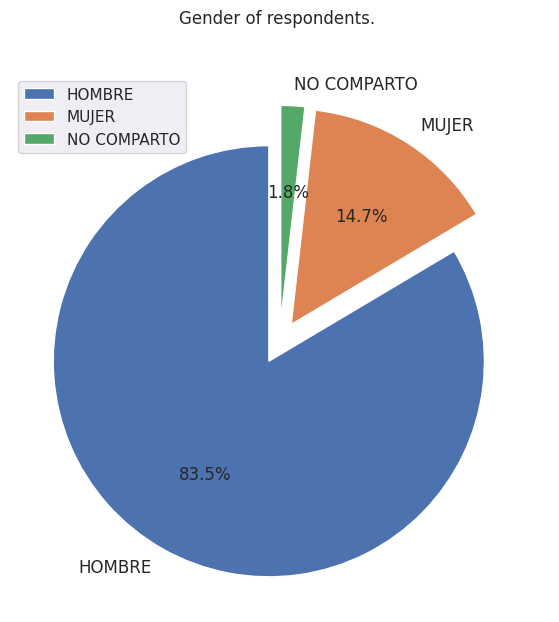

In [82]:
g_df = df["genero"].value_counts(normalize=True)
g_plot = g_df.plot(
    kind="pie",
    title="Gender of respondents. \n\n",
    ylabel="",
    explode=(0.1, 0.1, 0.1),
    startangle=90,
    legend=True,
    # colors=[get_color(i, "light") for i in g_df.keys()],
    autopct="%1.1f%%",
    textprops={"fontsize": 12},
)

In [83]:
gnro = eh.percentage_to_normal(df["genero"].value_counts(normalize=True))
print(gnro)

genero
HOMBRE         83.5 %
MUJER          14.7 %
NO COMPARTO     1.8 %
Name: proportion, dtype: object


### GENDER by AGE

In [84]:
edades = [i for i in df["edad_actual"].value_counts().keys()]

edades_agrupadas = df.groupby("edad_actual")
edades

['30-34',
 '25-29',
 '35-39',
 '20-24',
 '40-44',
 '15-19',
 '45-49',
 '55-59',
 '50-54']

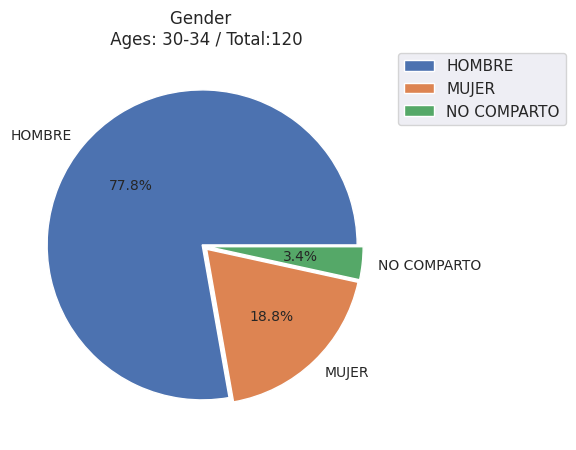

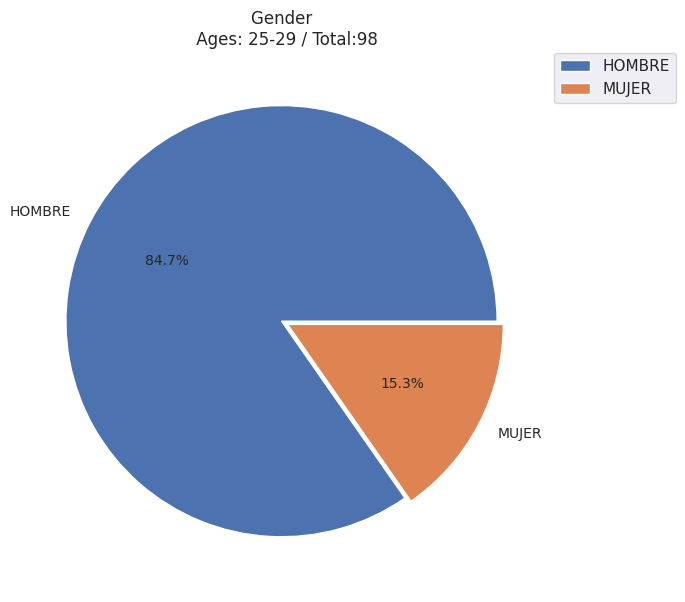

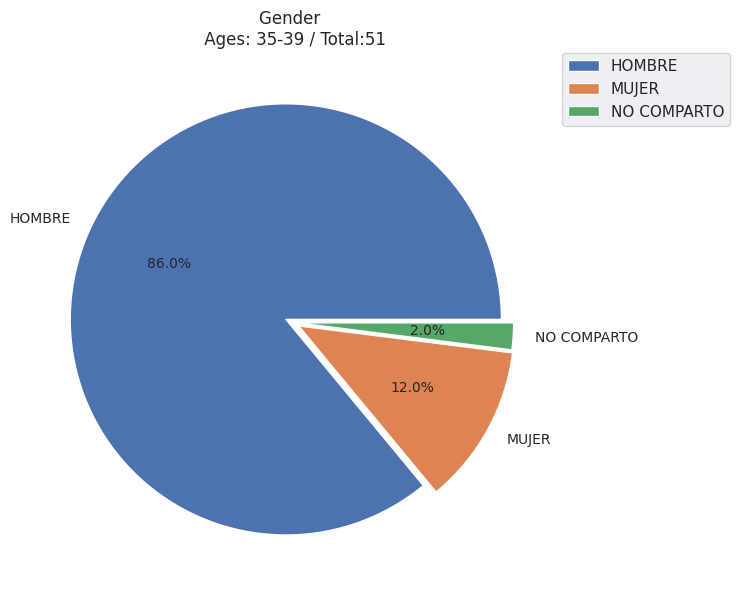

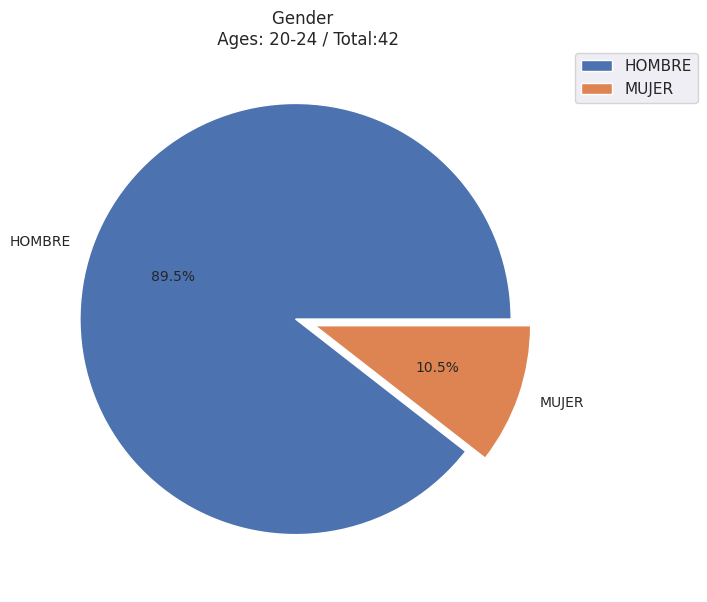

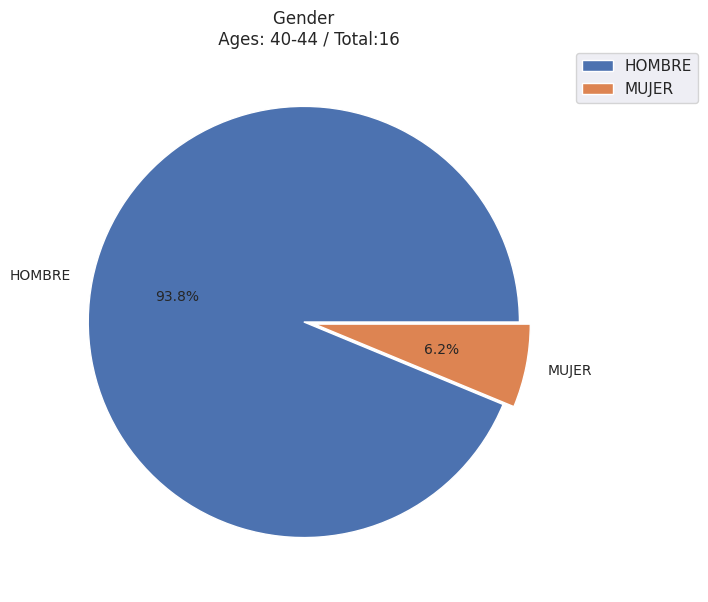

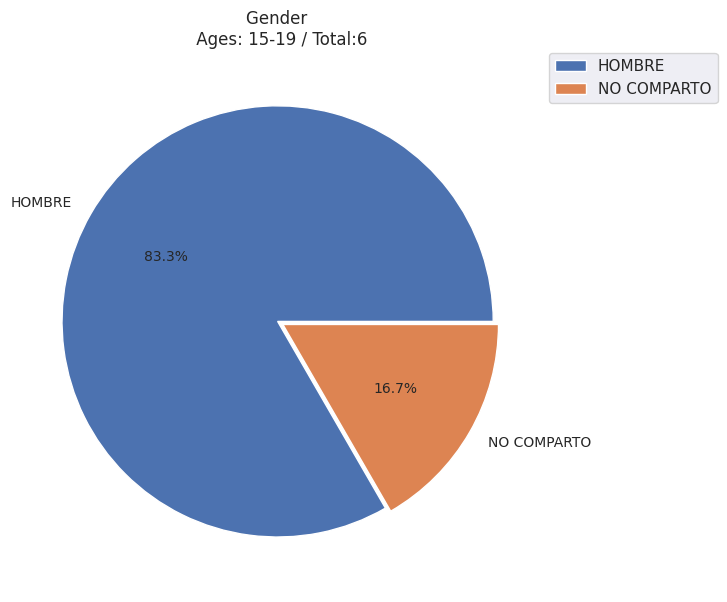

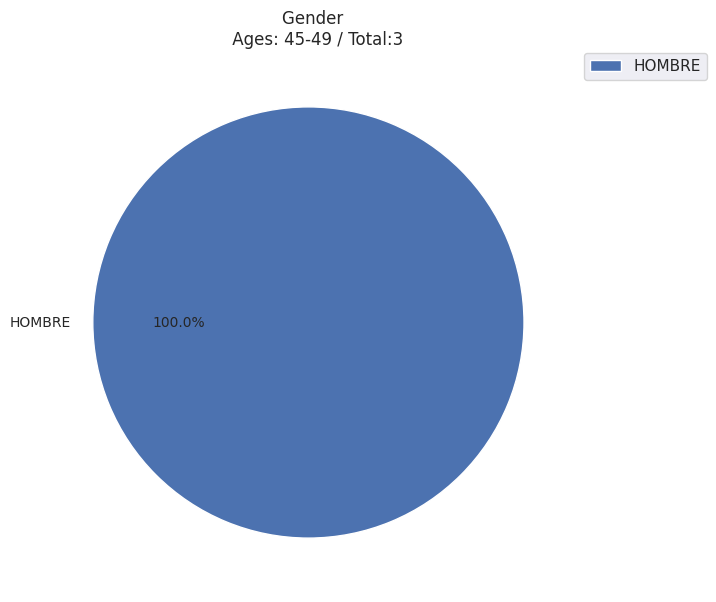

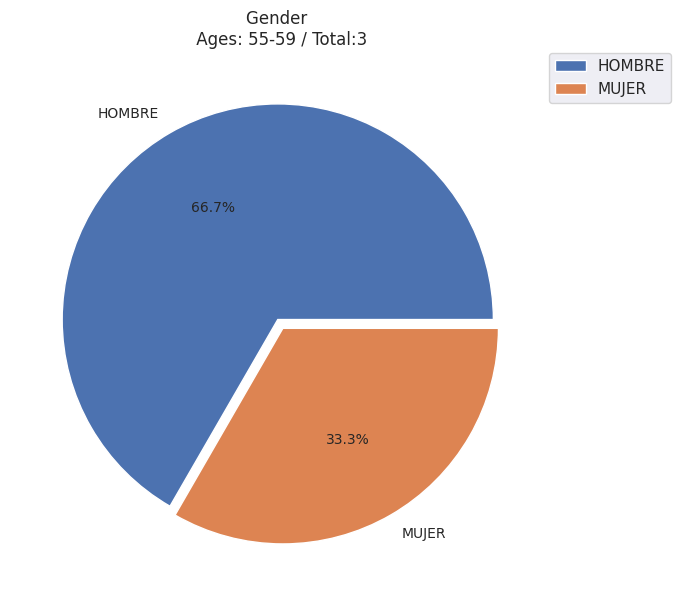

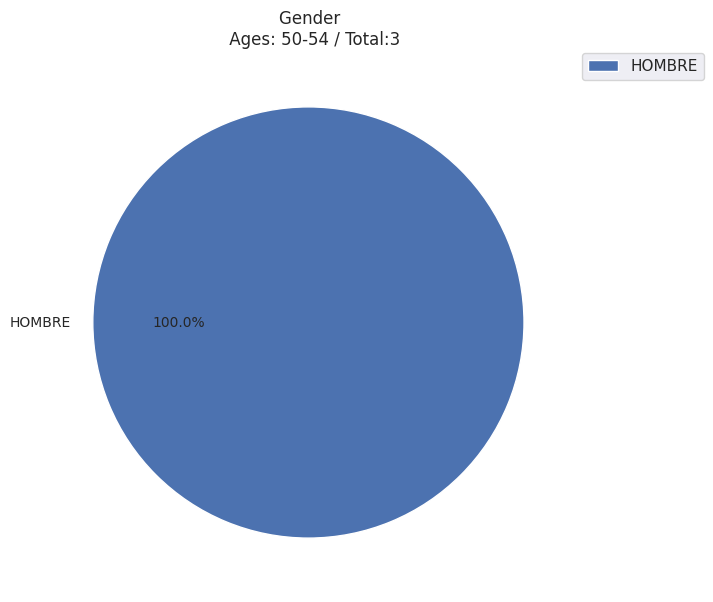

In [85]:
plt.figure(figsize=(5, 10))

for k, v in enumerate(edades):
    # plt.subplot(5, 2, k + 1)

    genero_df = edades_agrupadas.get_group(v)["genero"].value_counts(normalize=True)
    genero_df.plot(
        kind="pie",
        title="Gender \n Ages: {0} / Total:{1}".format(
            v, edades_agrupadas.get_group(v)["genero"].shape[0]
        ),
        ylabel="",
        autopct="%1.1f%%",
        legend=True,
        explode=eh.explode_pie(genero_df.size),
        textprops={"fontsize": 10},
    )
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", borderaxespad=0)

    plt.show()


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [86]:
for k, v in enumerate(edades):
    print(
        "> Genero - {0} - C|{1} \n{2} \n==============================================\n".format(
            v,
            edades_agrupadas.get_group(v)["genero"].shape[0],
            eh.percentage_to_normal(
                edades_agrupadas.get_group(v)["genero"].value_counts(normalize=True)
            ),
        )
    )

> Genero - 30-34 - C|120 
genero
HOMBRE         77.8 %
MUJER          18.8 %
NO COMPARTO     3.4 %
Name: proportion, dtype: object 

> Genero - 25-29 - C|98 
genero
HOMBRE    84.7 %
MUJER     15.3 %
Name: proportion, dtype: object 

> Genero - 35-39 - C|51 
genero
HOMBRE         86.0 %
MUJER          12.0 %
NO COMPARTO     2.0 %
Name: proportion, dtype: object 

> Genero - 20-24 - C|42 
genero
HOMBRE    89.5 %
MUJER     10.5 %
Name: proportion, dtype: object 

> Genero - 40-44 - C|16 
genero
HOMBRE    93.8 %
MUJER      6.2 %
Name: proportion, dtype: object 

> Genero - 15-19 - C|6 
genero
HOMBRE         83.3 %
NO COMPARTO    16.7 %
Name: proportion, dtype: object 

> Genero - 45-49 - C|3 
genero
HOMBRE    100.0 %
Name: proportion, dtype: object 

> Genero - 55-59 - C|3 
genero
HOMBRE    66.7 %
MUJER     33.3 %
Name: proportion, dtype: object 

> Genero - 50-54 - C|3 
genero
HOMBRE    100.0 %
Name: proportion, dtype: object 



### Genero by Profession

In [87]:
generos = df.groupby("genero")

 #### HOMBRE vs Profession

In [88]:
generos.groups.keys()

dict_keys(['HOMBRE', 'MUJER', 'NO COMPARTO'])

In [89]:
hombres_df = generos.get_group("HOMBRE")

In [90]:
ed = None

               Categories  total
0      Dev de videojuegos      3
1            Dev back-end    121
2            Project Lead     53
3          Dev full-stack    142
4    Aps para Esc. o Emp.     62
5                DB Admin     61
6           Dev front-end     87
7            QA o testing     23
8              Dev mobile     49
9  Dev de sist. embebidos     20






/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


<Figure size 900x600 with 0 Axes>

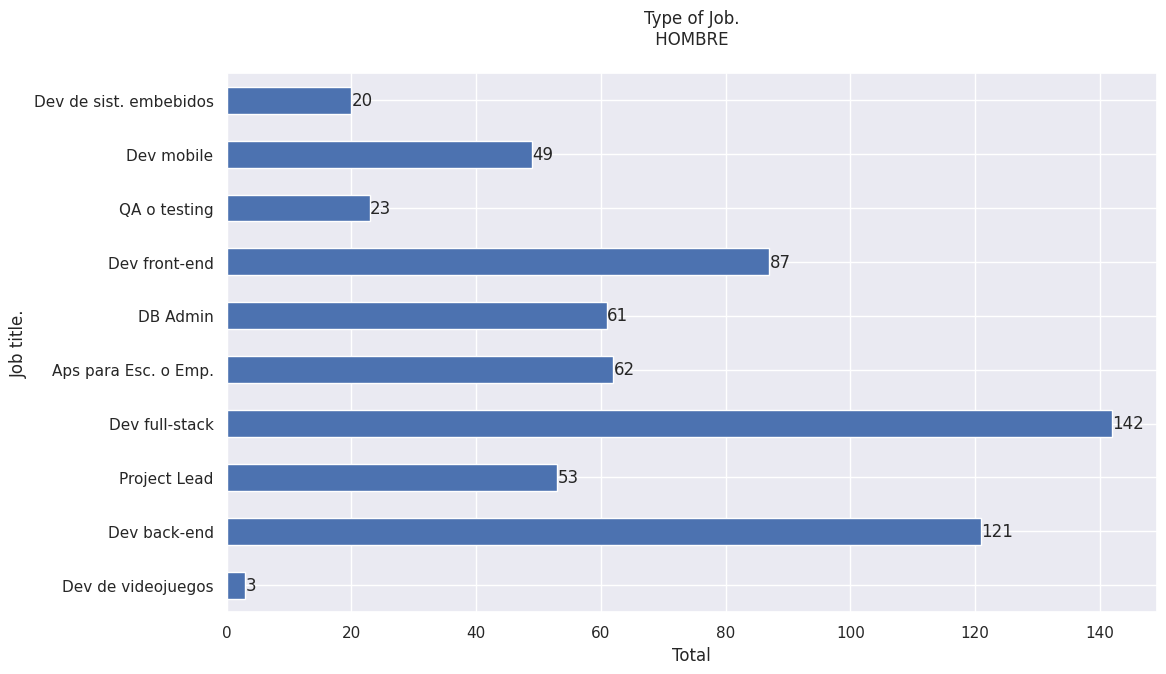

In [91]:
fig = plt.figure(figsize=(9, 6))

tipo_trabajo_df = eh.make_df(
    generos.get_group("HOMBRE"), "tipo_de_trabajo", "Categories", "total"
)
print(tipo_trabajo_df)
print("\n" * 3)

tipo_trabajo_plot = tipo_trabajo_df.plot(
    kind="barh",
    title="Type of Job.\n HOMBRE \n",
    ylabel="Total",
    xlabel="Categories",
    legend=False,
)

tipo_trabajo_plot.set_xlabel("Total")
tipo_trabajo_plot.set_ylabel("Job title.")


tipo_trabajo_plot.set_yticklabels([i for i in tipo_trabajo_df["Categories"]])


for k, v in enumerate([i for i in tipo_trabajo_df["total"]]):
    tipo_trabajo_plot.annotate(v, (v, k), va="center")

plt.show()

In [92]:
tipo_trabajo_df

,Categories,total
0,Dev de videojuegos,3
1,Dev back-end,121
2,Project Lead,53
3,Dev full-stack,142
4,Aps para Esc. o Emp.,62
5,DB Admin,61
6,Dev front-end,87
7,QA o testing,23
8,Dev mobile,49
9,Dev de sist. embebidos,20


#### Women

In [93]:
generos.groups.keys()

dict_keys(['HOMBRE', 'MUJER', 'NO COMPARTO'])

/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


<Figure size 900x600 with 0 Axes>

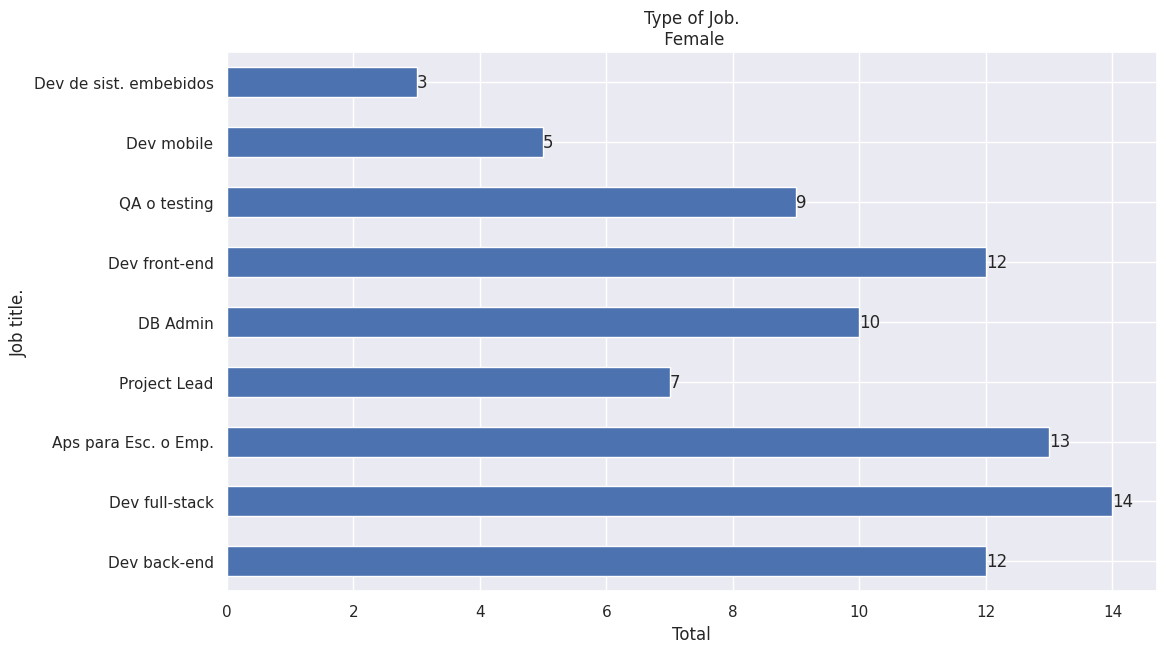

In [94]:
fig = plt.figure(figsize=(9, 6))

mujer_tipo_trabajo_df = eh.make_df(
    generos.get_group("MUJER"), "tipo_de_trabajo", "Categories", "total"
)


mujer_tipo_trabajo_plot = mujer_tipo_trabajo_df.plot(
    kind="barh",
    title="Type of Job.\n Female",
    legend=False,
)
mujer_tipo_trabajo_plot.set_ylabel("Job title.")
mujer_tipo_trabajo_plot.set_xlabel("Total")

mujer_tipo_trabajo_plot.set_yticklabels(
    [i for i in mujer_tipo_trabajo_df["Categories"]]
)


for k, v in enumerate([i for i in mujer_tipo_trabajo_df["total"]]):
    mujer_tipo_trabajo_plot.annotate(v, (v, k), va="center")

plt.show()

# Type of job. HOMBRE vs. MUJER

In [95]:
generos.groups.keys()

dict_keys(['HOMBRE', 'MUJER', 'NO COMPARTO'])

/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


<Figure size 1200x2400 with 0 Axes>

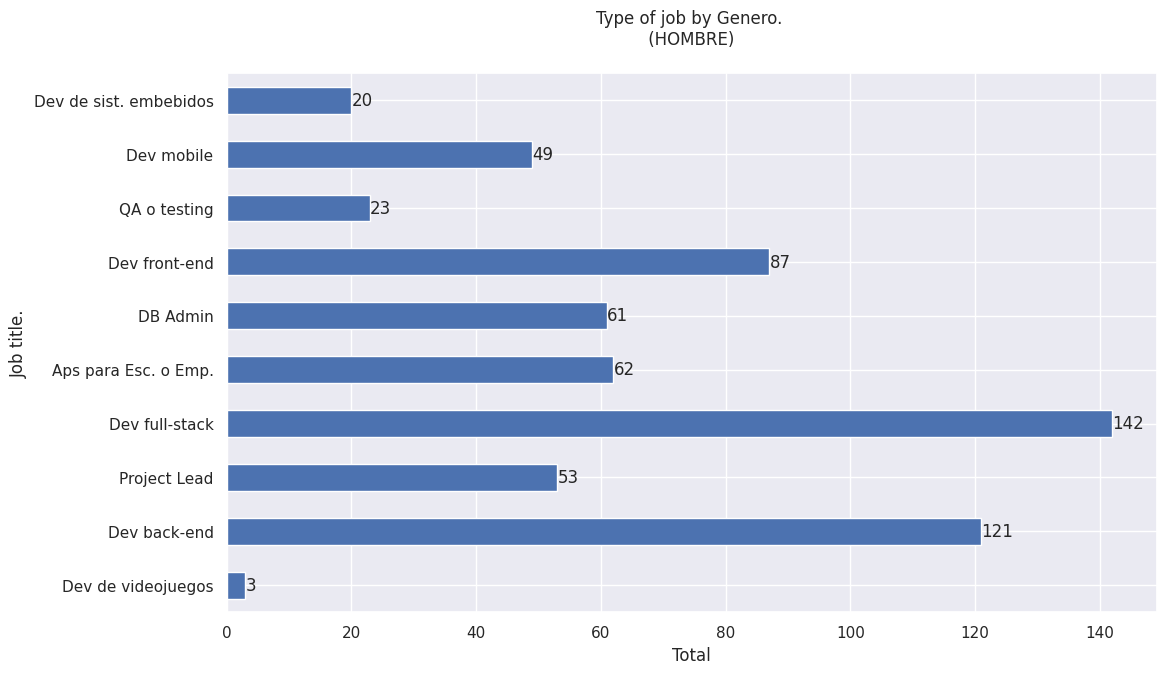

/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


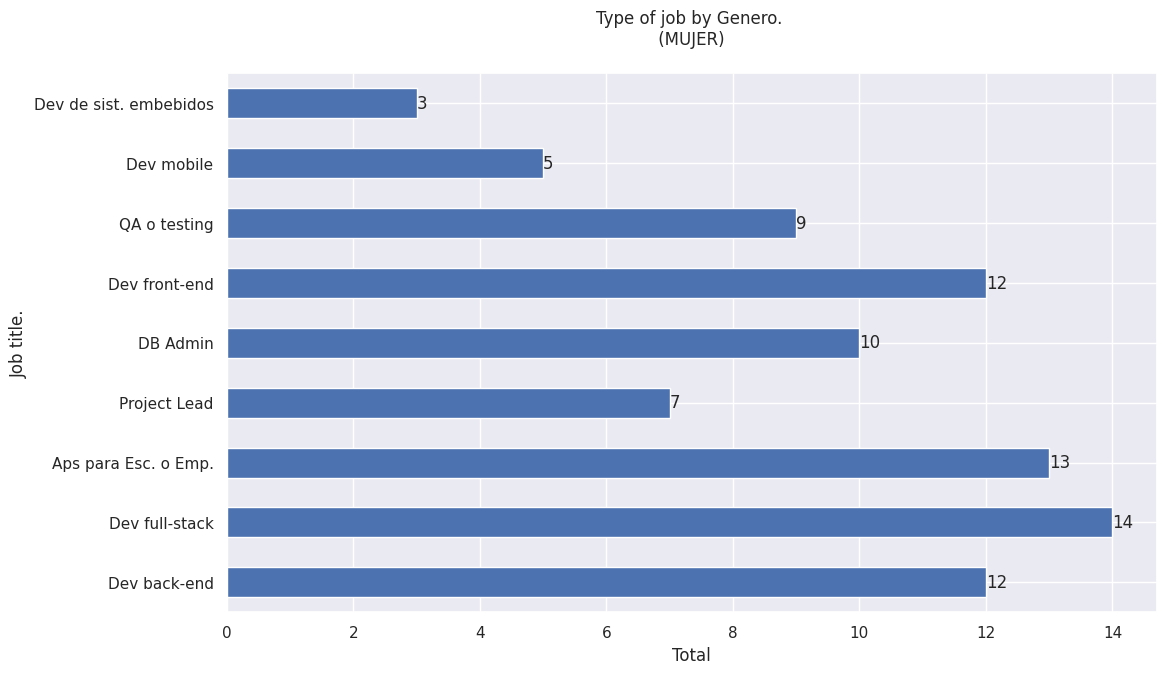

/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


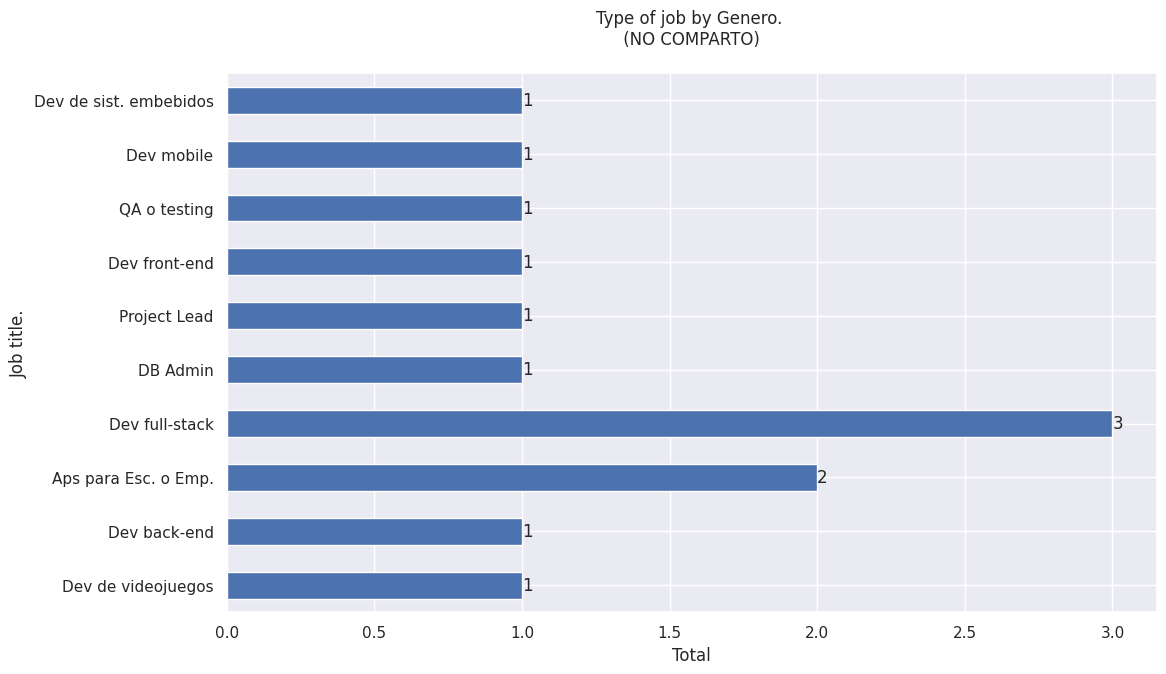

In [96]:
plt.figure(figsize=(15, 30), dpi=80)
g = [i for i in generos.groups.keys()]

for k, v in enumerate(g):
    # plt.subplot(20, 3, k + 1)
    ax_df = eh.make_df(generos.get_group(v), "tipo_de_trabajo", "Categories", "Total")
    ax_df_plot = ax_df.plot(
        kind="barh",
        title=f"Type of job by Genero. \n ({v}) \n",
        # color=get_color(v, "dark"),
        legend=False,
    )
    ax_df_plot.set_ylabel("Job title.")
    ax_df_plot.set_xlabel("Total")

    ax_df_plot.set_yticklabels([i for i in ax_df["Categories"]])

    for k, v in enumerate([i for i in ax_df["Total"]]):
        ax_df_plot.annotate(v, (v, k), va="center")

    plt.show()


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.5)

# IT Experience by Gender


#### HOMBRE

In [97]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [98]:
eh.percentage_to_normal(
    generos.get_group("HOMBRE")["exp_en_IT"].value_counts(normalize=True)
)

exp_en_IT
5-9      35.1 %
<5       26.9 %
10-14    25.4 %
15-19     5.4 %
20-24     3.2 %
25-29     1.8 %
30-34     1.4 %
35-39     0.4 %
>50       0.4 %
Name: proportion, dtype: object

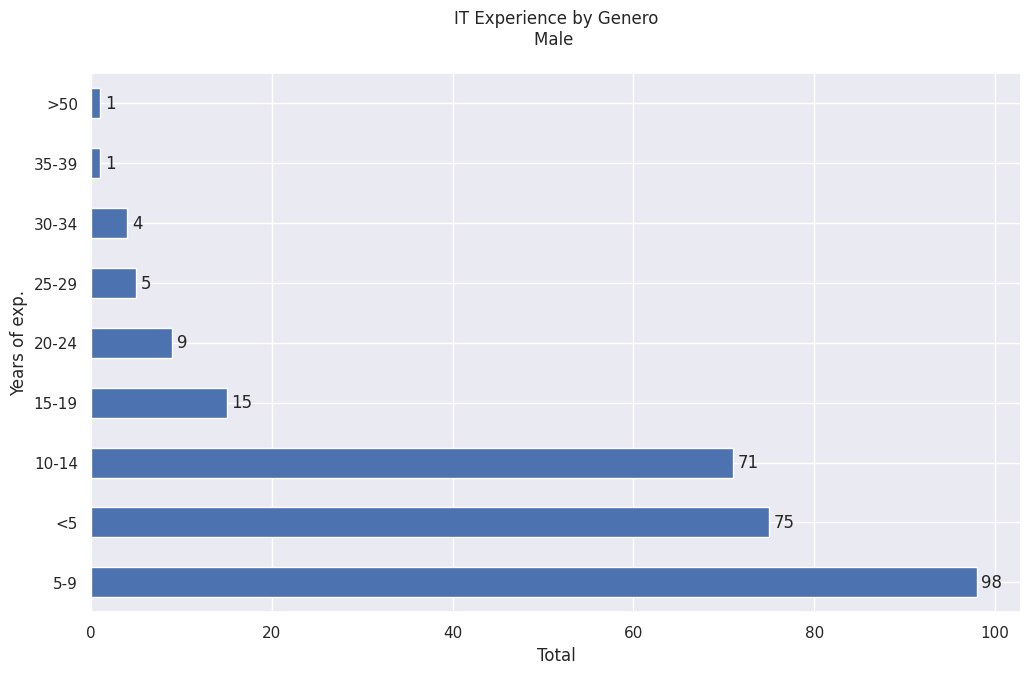

In [99]:
exp_it_g_df = generos.get_group("HOMBRE")["exp_en_IT"].value_counts()
exp_it_g_plot = exp_it_g_df.plot(
    kind="barh",
    title="IT Experience by Genero\nMale \n",
)

exp_it_g_plot.set_xlabel("Total")
exp_it_g_plot.set_ylabel("Years of exp.")

for k, v in enumerate(exp_it_g_df):
    exp_it_g_plot.annotate(v, (v + 0.5, k), va="center")

#### MUJER

In [100]:
exp_it_mujeres_df = generos.get_group("MUJER")["exp_en_IT"].value_counts(normalize=True)

In [101]:
eh.percentage_to_normal(exp_it_mujeres_df)

exp_en_IT
5-9      46.9 %
<5       28.6 %
10-14    14.3 %
15-19     8.2 %
35-39     2.0 %
Name: proportion, dtype: object

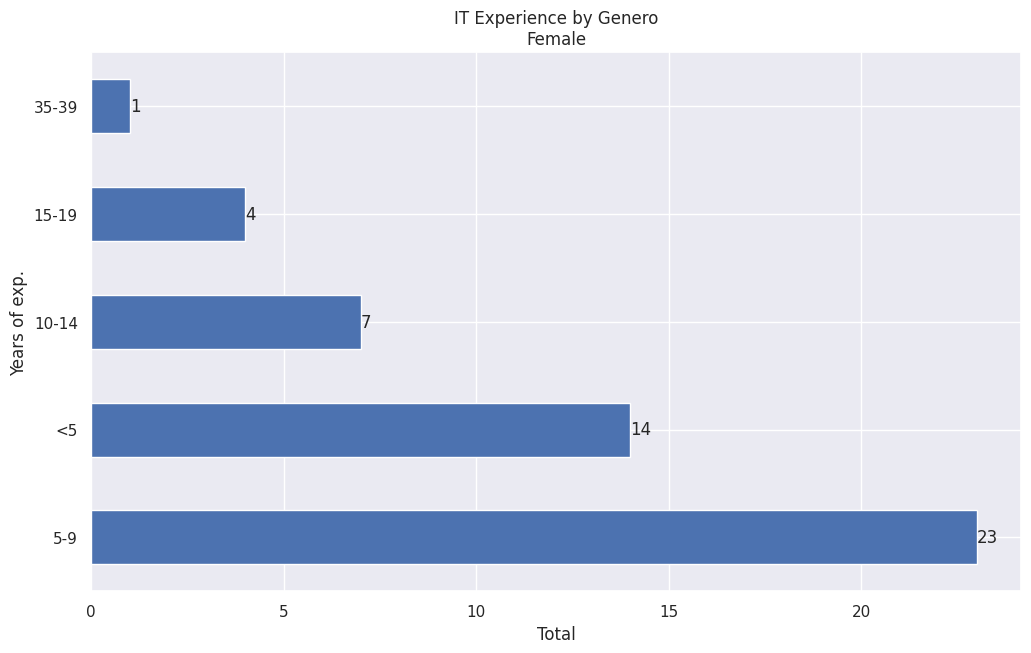

In [118]:
exp_it_muj_df = generos.get_group("MUJER")["exp_en_IT"].value_counts()
exp_it_muj_plot = exp_it_muj_df.plot(
    kind="barh",
    title="IT Experience by Genero\nFemale",
)
exp_it_muj_plot.set_xlabel("Total")
exp_it_muj_plot.set_ylabel("Years of exp.")

for k, v in enumerate(exp_it_muj_df):
    exp_it_muj_plot.annotate(v, (v, k), va="center")

### NO COMPARTO

In [103]:
generos.groups.keys()

dict_keys(['HOMBRE', 'MUJER', 'NO COMPARTO'])

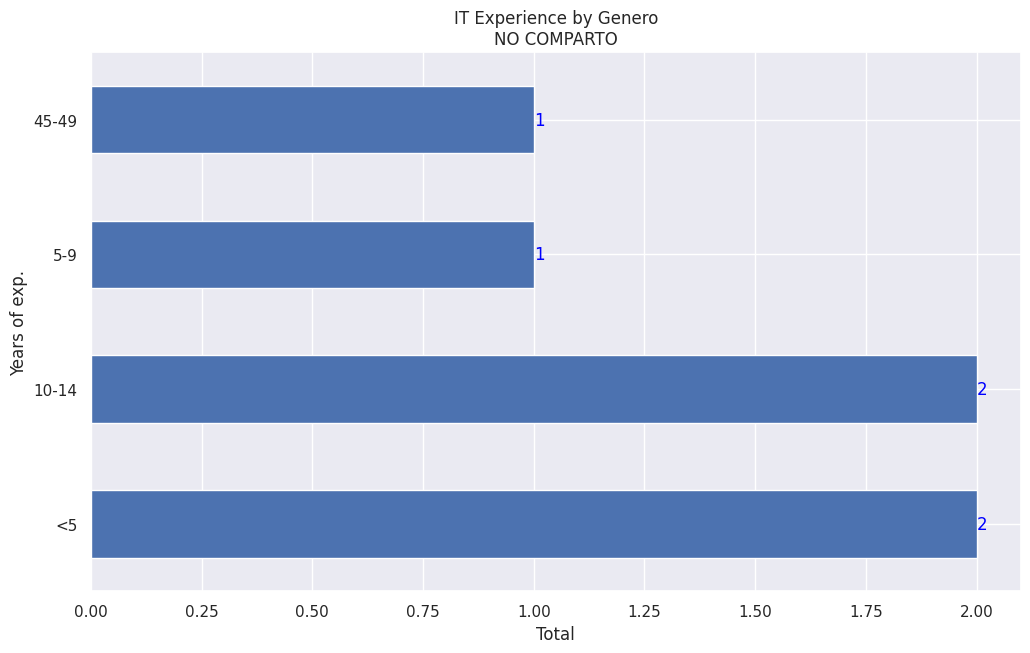

In [119]:
exp_noc_df = generos.get_group("NO COMPARTO")["exp_en_IT"].value_counts()
exp_noc_plot = exp_noc_df.plot(
    kind="barh",
    title="IT Experience by Genero\nNO COMPARTO",
)

exp_noc_plot.set_xlabel("Total")
exp_noc_plot.set_ylabel("Years of exp.")

for k, v in enumerate(exp_noc_df):
    exp_noc_plot.annotate(v, (v, k), va="center", color="blue")

# IT experience - Comparison by Genero.

In [105]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

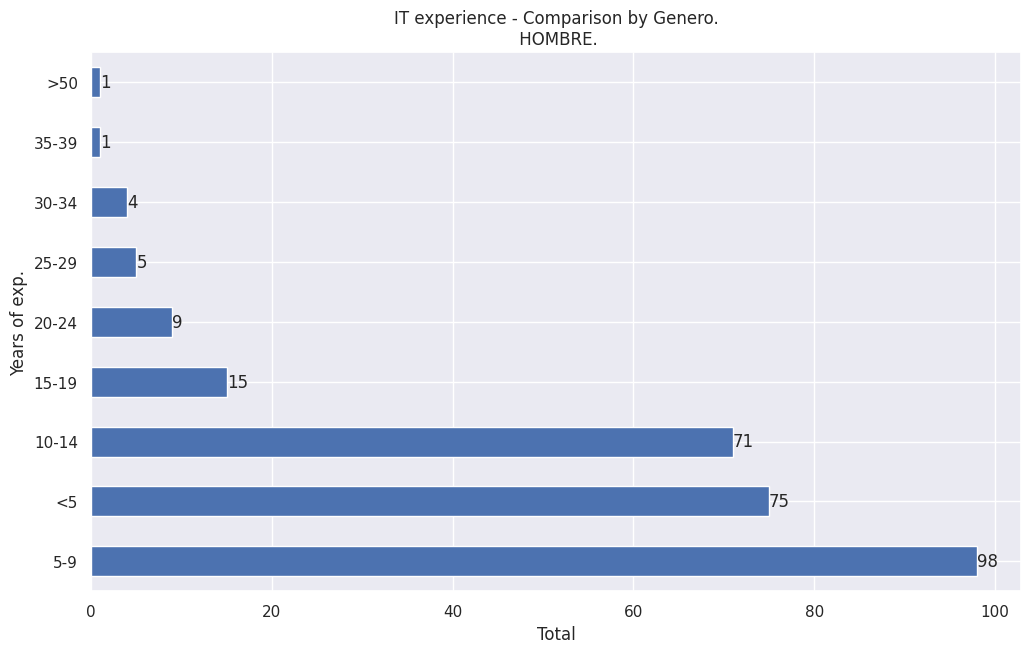

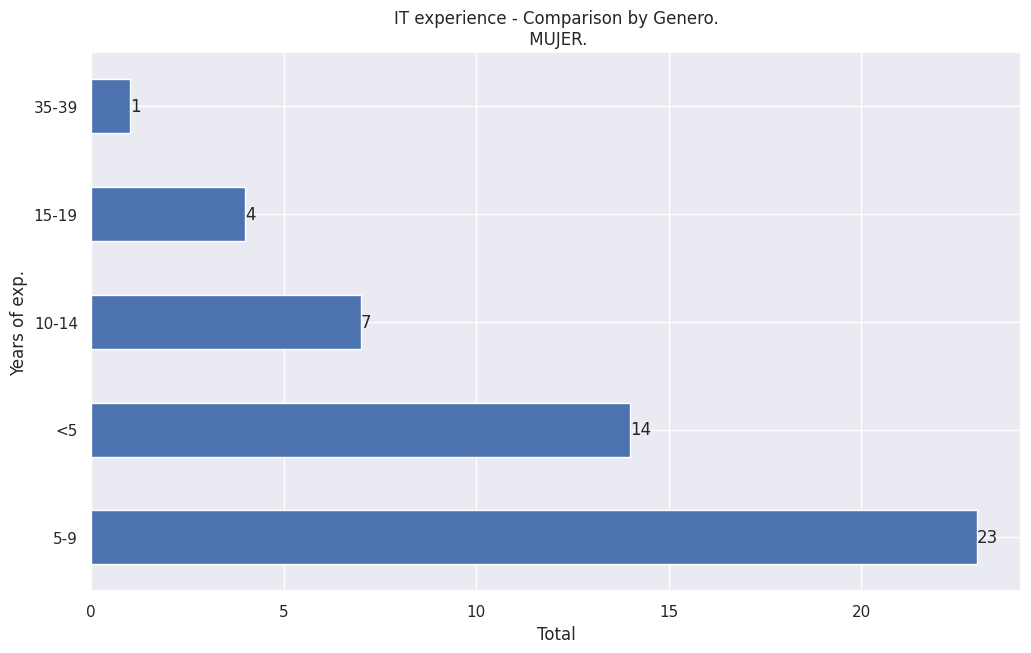

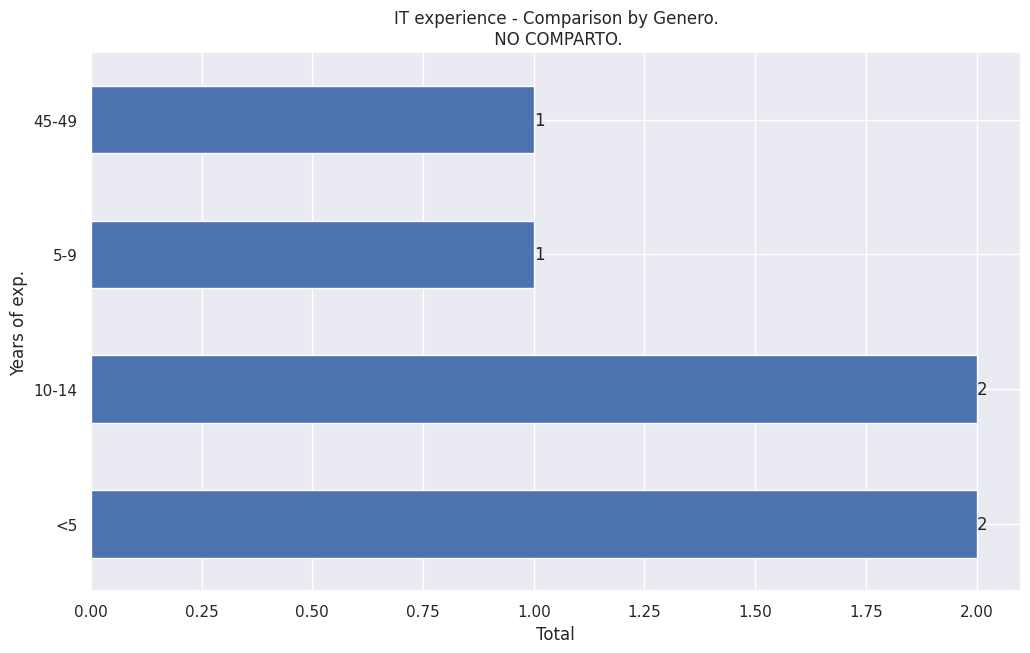

In [120]:
# plt.figure(figsize=(10, 30), dpi=80)


g = [i for i in generos.groups.keys()]

for k, v in enumerate(g):
    # plt.subplot(10, 1, k + 1)
    exp_df = generos.get_group(v)["exp_en_IT"].value_counts(normalize=False)
    exp_plot = exp_df.plot(
        kind="barh",
        title=f"IT experience - Comparison by Genero.\n {v}.",
        xlabel="Years of exp.",
    )
    exp_plot.set_xlabel("Total")
    exp_plot.set_ylabel("Years of exp.")

    for k, v in enumerate(exp_df):
        exp_plot.annotate(v, (v, k), va="center")
    plt.show()

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1, wspace=0.4, hspace=0.9)

### Current age by Genero.

- HOMBRE

In [107]:
eh.percentage_to_normal(
    generos.get_group("HOMBRE")["edad_actual"].value_counts(normalize=True)
)

edad_actual
30-34    32.6 %
25-29    29.7 %
35-39    15.4 %
20-24    12.2 %
40-44     5.4 %
15-19     1.8 %
45-49     1.1 %
50-54     1.1 %
55-59     0.7 %
Name: proportion, dtype: object

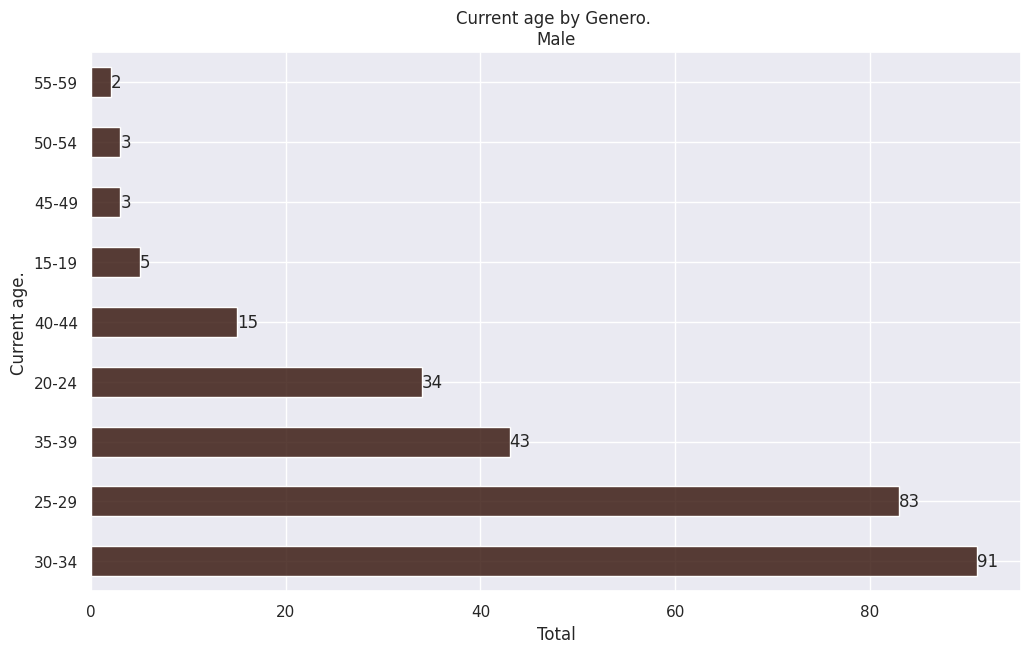

In [108]:
ed_hombres_df = generos.get_group("HOMBRE")["edad_actual"].value_counts()
ed_hombres_plot = ed_hombres_df.plot(
    kind="barh",
    title="Current age by Genero. \nMale",
    color=get_color("HOMBRE", "dark"),
)

ed_hombres_plot.set_xlabel("Total")
ed_hombres_plot.set_ylabel("Current age.")

for k, v in enumerate(ed_hombres_df):
    ed_hombres_plot.annotate(v, (v, k), va="center")

- MUJER

In [109]:
eh.percentage_to_normal(
    generos.get_group("MUJER")["edad_actual"].value_counts(normalize=True)
)

edad_actual
30-34    44.9 %
25-29    30.6 %
35-39    12.2 %
20-24     8.2 %
55-59     2.0 %
40-44     2.0 %
Name: proportion, dtype: object

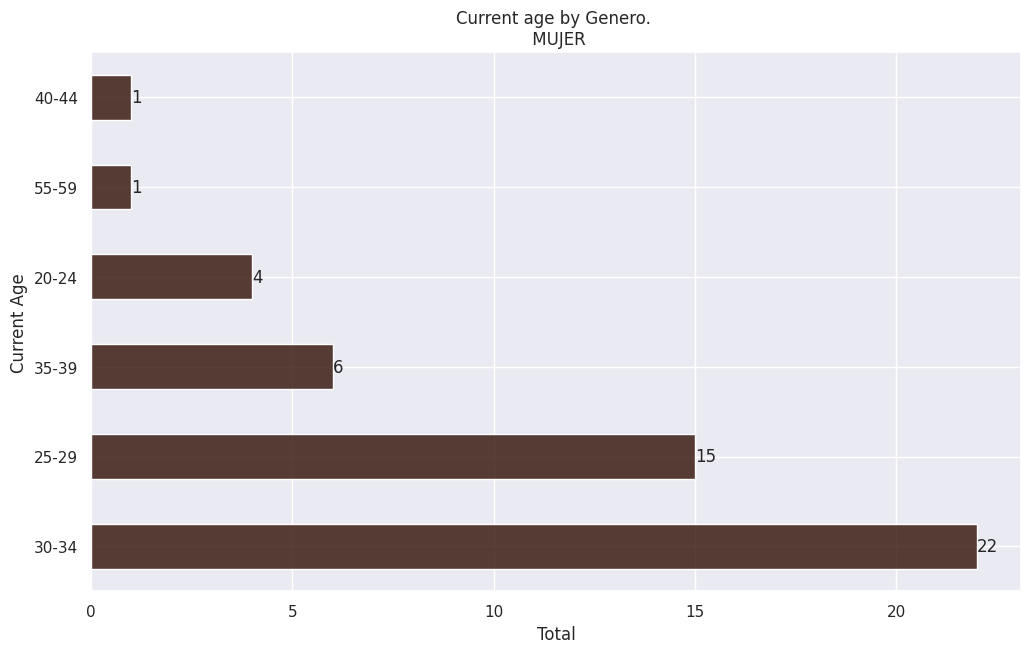

In [110]:
muj_ed_actual_df = generos.get_group("MUJER")["edad_actual"].value_counts()
muj_ed_actual_plot = muj_ed_actual_df.plot(
    kind="barh",
    title="Current age by Genero. \n MUJER",
    color=get_color("MUJER", "dark"),
)
muj_ed_actual_plot.set_xlabel("Total")
muj_ed_actual_plot.set_ylabel("Current Age")


for k, v in enumerate(muj_ed_actual_df):
    muj_ed_actual_plot.annotate(v, (v, k), va="center")

- I DO NOT SHARE

In [111]:
eh.percentage_to_normal(
    generos.get_group("NO COMPARTO")["edad_actual"].value_counts(normalize=True)
)

edad_actual
30-34    66.7 %
35-39    16.7 %
15-19    16.7 %
Name: proportion, dtype: object

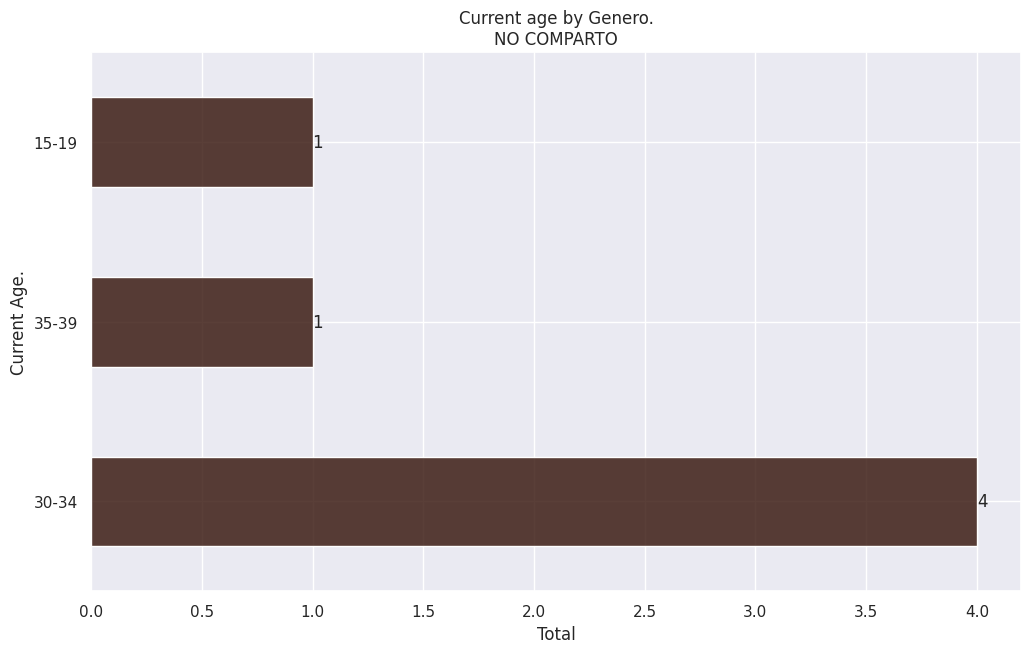

In [112]:
noc_ed_df = generos.get_group("NO COMPARTO")["edad_actual"].value_counts()
moc_ed_plot = noc_ed_df.plot(
    kind="barh",
    title="Current age by Genero.\nNO COMPARTO",
    color=get_color("NO COMPARTO", "dark"),
)
moc_ed_plot.set_xlabel("Total")
moc_ed_plot.set_ylabel("Current Age.")


for k, v in enumerate(noc_ed_df):
    moc_ed_plot.annotate(v, (v, k), va="center")

# Comparison "current age" vs "Genero".

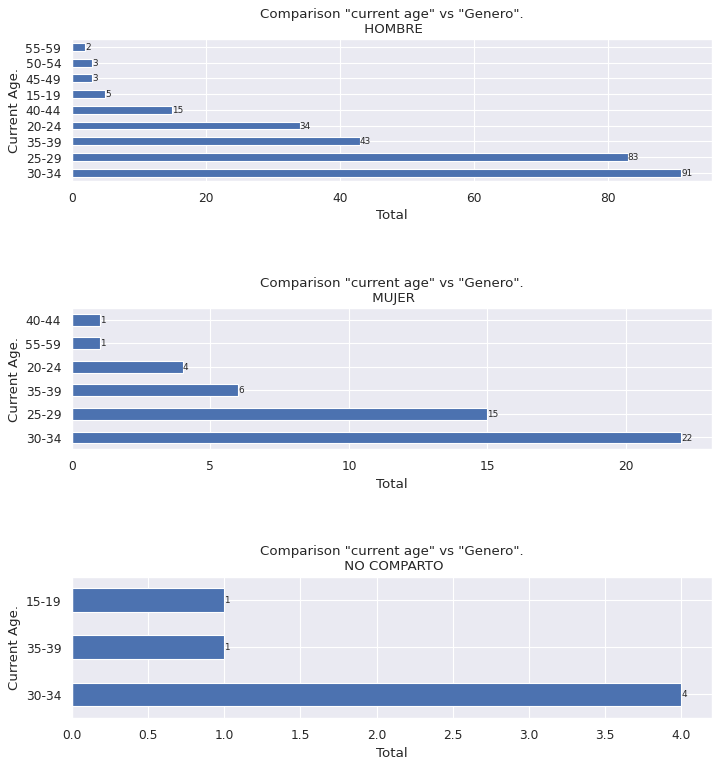

In [122]:
plt.figure(figsize=(10, 40), dpi=80)


g = [i for i in generos.groups.keys()]

for k, v in enumerate(g):
    plt.subplot(10, 1, k + 1)
    gen_ed_df = generos.get_group(v)["edad_actual"].value_counts()
    gen_ed_plot = gen_ed_df.plot(
        kind="barh",
        title=f'Comparison "current age" vs "Genero".\n {v}',
    )
    gen_ed_plot.set_xlabel("Total")
    gen_ed_plot.set_ylabel("Current Age.")

    for k, v in enumerate(gen_ed_df):
        gen_ed_plot.annotate(v, (v, k), va="center", size=8)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.9)

# IT experience vs. Current age by Genero.

In [114]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [115]:
ee_group = df.groupby(["exp_en_IT", "edad_actual"])  # [primero, segundo]

IT experience: 10-14 years | Current age: 20-24 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 10-14 years | Current age: 25-29 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64






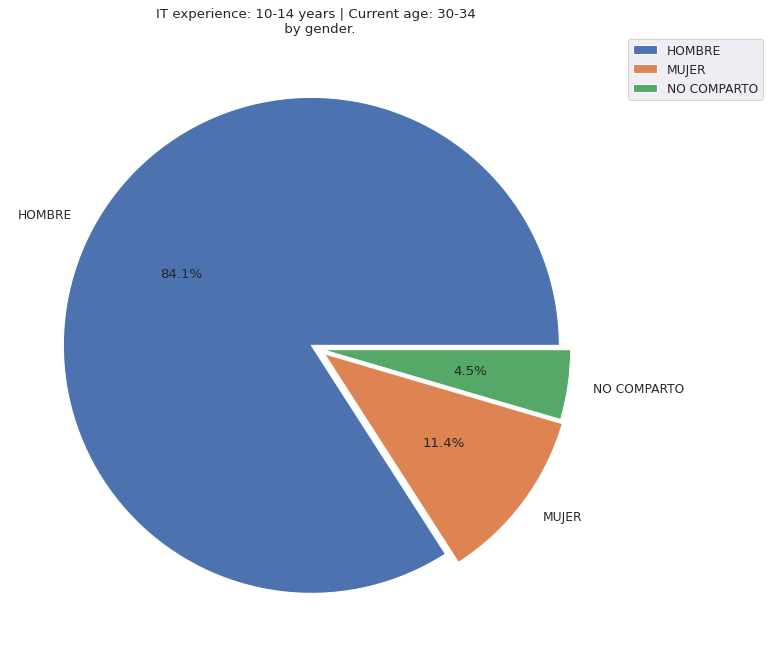

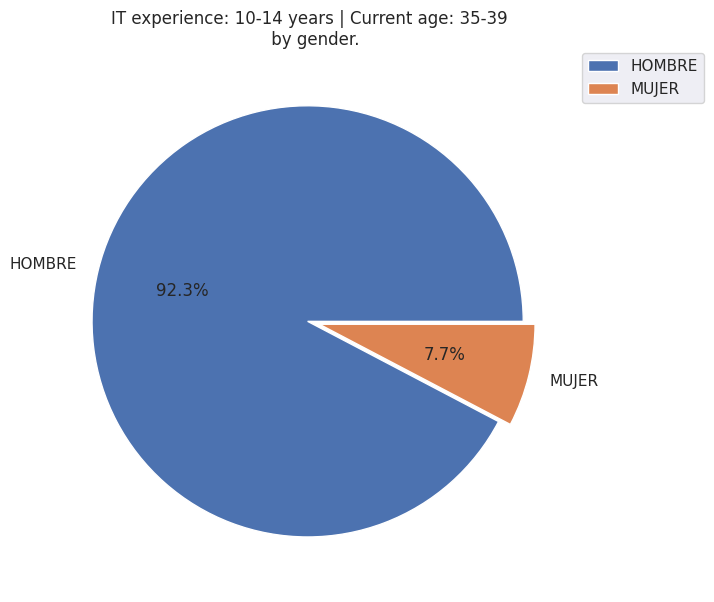

IT experience: 10-14 years | Current age: 40-44 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 15-19 years | Current age: 25-29 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64






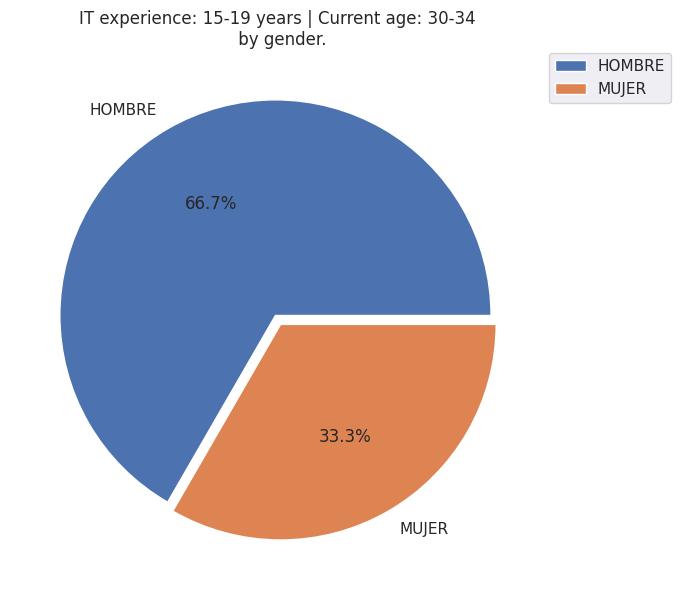

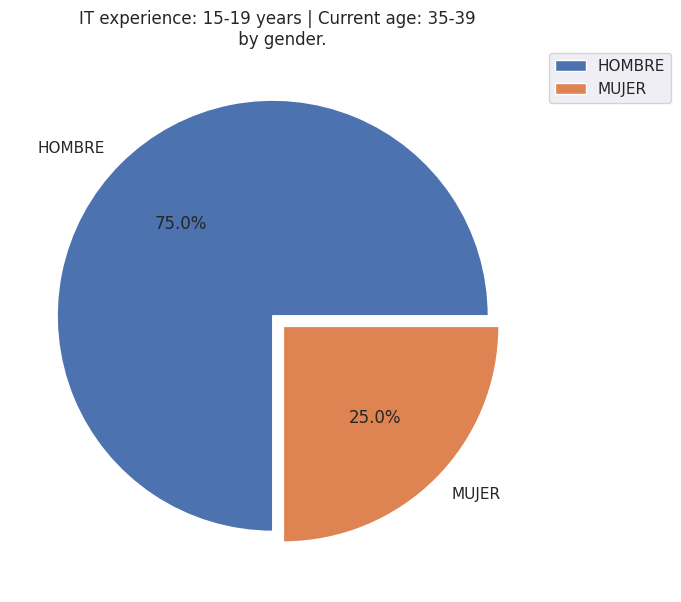

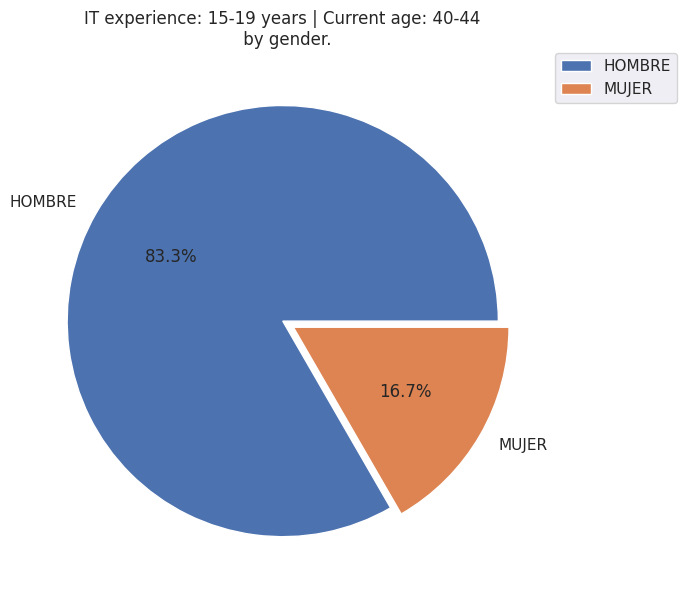

IT experience: 20-24 years | Current age: 35-39 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 20-24 years | Current age: 40-44 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 25-29 years | Current age: 40-44 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 25-29 years | Current age: 45-49 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 25-29 years | Current age: 50-54 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 30-34 years | Current age: 35-39 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 30-34 years | Current age: 40-44 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 30-34 years | Current age: 50-54 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: 30-34 years | Current age: 55-59 

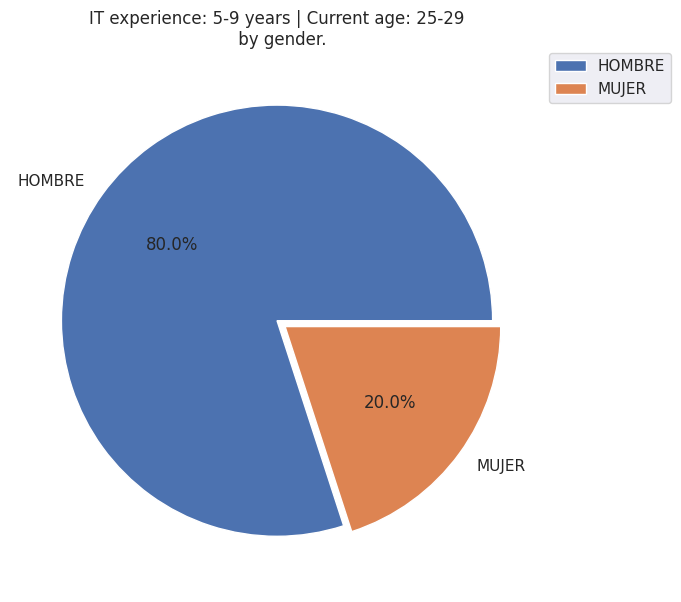

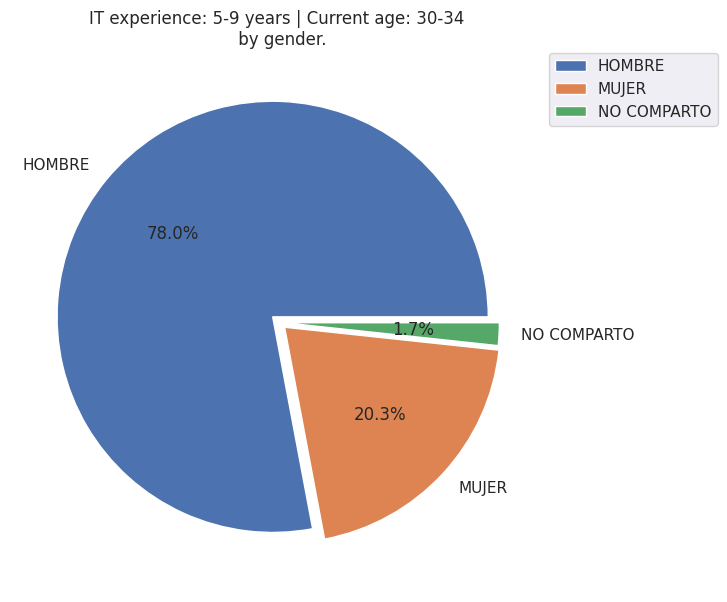

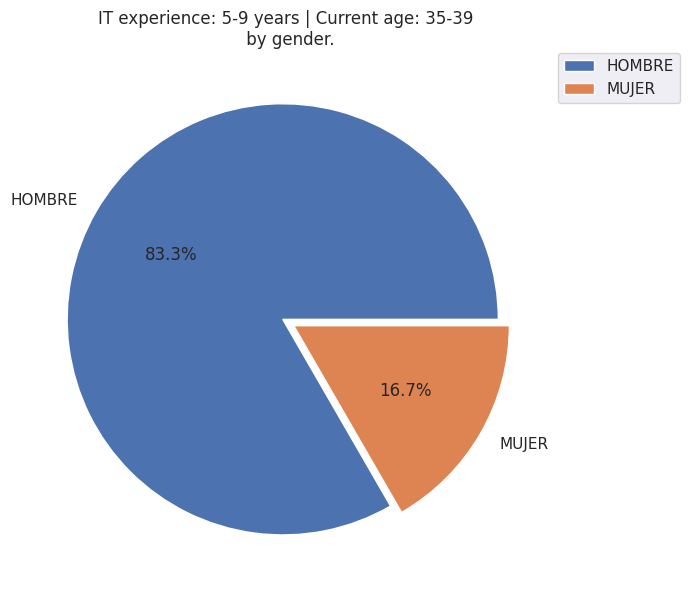

IT experience: 5-9 years | Current age: 40-44 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64






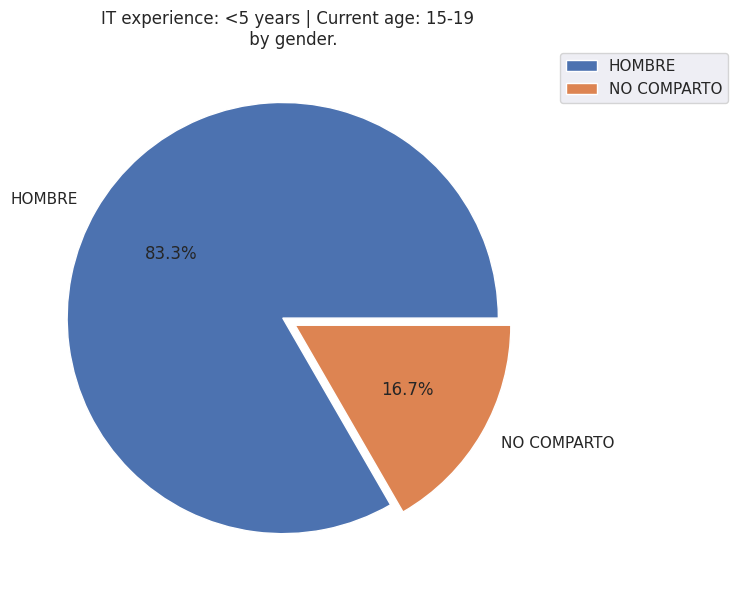

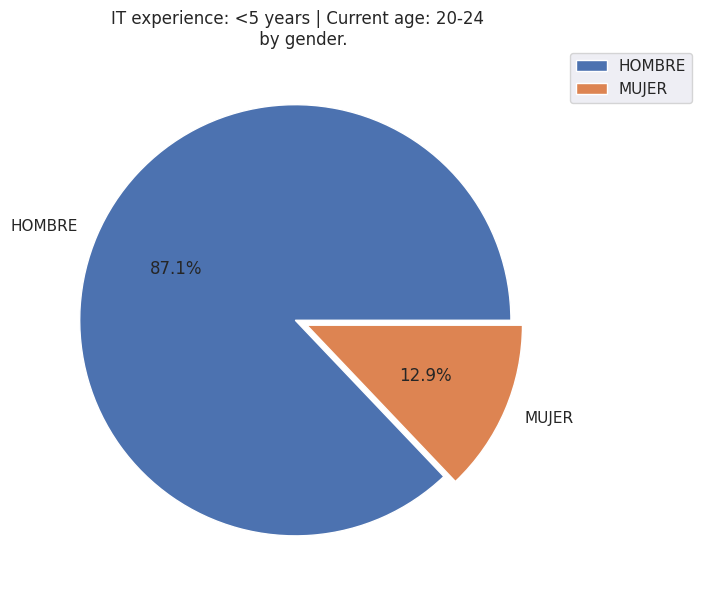

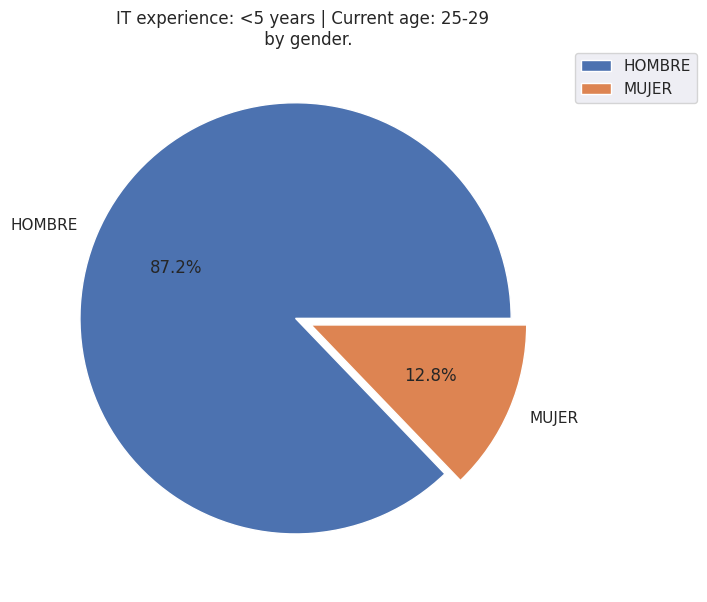

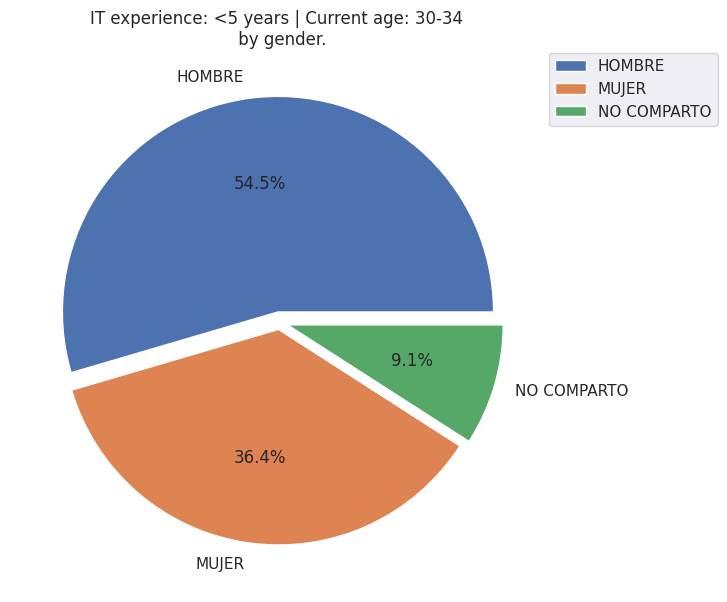

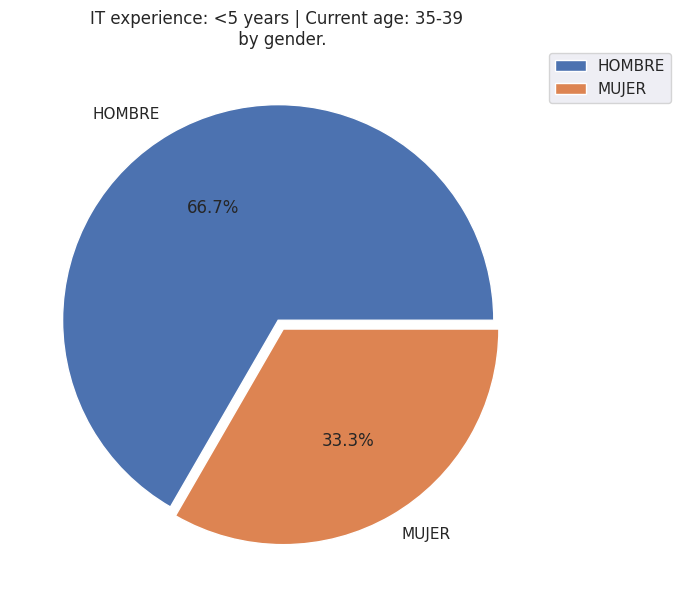

IT experience: <5 years | Current age: 40-44 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64




IT experience: >50 years | Current age: 55-59 
 by gender.
genero
HOMBRE    1.0
Name: proportion, dtype: float64






In [128]:
plt.figure(figsize=(10, 60), dpi=80)

colors = [
    get_color("HOMBRE", "dark"),
    get_color("MUJER", "dark"),
    get_color("NO COMPARTO", "dark"),
]


for k, v in enumerate(ee_group.groups.keys()):
    # plt.subplot(45, 2, k + 1)
    exp_edad_df = ee_group.get_group(v)["genero"].value_counts(normalize=True)
    if exp_edad_df.size == 1:
        print("=" * 55)
        print(f"IT experience: {v[0]} years | Current age: {v[1]} \n by gender.")
        print(exp_edad_df)
        print("\n" * 3)

    else:
        exp_edad_plot = exp_edad_df.plot(
            kind="pie",
            ylabel="",
            # colors=[get_color(i, "light") for i in exp_edad_df.keys()],
            explode=eh.explode_pie(exp_edad_df.size),
            autopct="%1.1f%%",
            title=f"IT experience: {v[0]} years | Current age: {v[1]} \n by gender.",
        )
        plt.legend(bbox_to_anchor=(1, 1), loc="upper left", borderaxespad=0)
        plt.show()


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.9)

In [117]:
for k, v in enumerate(ee_group.groups.keys()):
    ee_aux_df = (
        ee_group.get_group(v)["genero"]
        .value_counts(normalize=True)
        .mul(100)
        .round(1)
        .astype(str)
        + " %"
    )
    title = f"IT experience:{v[0]}. vs. Current age: {v[1]} by gender."
    if ee_aux_df.size > 1:
        print(title)
        print("_" * 55)
        print(ee_aux_df)
        print("\n" * 3)

IT experience:10-14. vs. Current age: 30-34 by gender.
_______________________________________________________
genero
HOMBRE         84.1 %
MUJER          11.4 %
NO COMPARTO     4.5 %
Name: proportion, dtype: object




IT experience:10-14. vs. Current age: 35-39 by gender.
_______________________________________________________
genero
HOMBRE    92.3 %
MUJER      7.7 %
Name: proportion, dtype: object




IT experience:15-19. vs. Current age: 30-34 by gender.
_______________________________________________________
genero
HOMBRE    66.7 %
MUJER     33.3 %
Name: proportion, dtype: object




IT experience:15-19. vs. Current age: 35-39 by gender.
_______________________________________________________
genero
HOMBRE    75.0 %
MUJER     25.0 %
Name: proportion, dtype: object




IT experience:15-19. vs. Current age: 40-44 by gender.
_______________________________________________________
genero
HOMBRE    83.3 %
MUJER     16.7 %
Name: proportion, dtype: object




IT experience:5-9. vs. Curre